In [40]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [41]:
# Define paths
train_path = r'Downloads\archive(2)\train_zip\train'
test_path = r'Downloads\archive(2)\test_zip\test'

# Initialize lists to store images and labels

In [42]:
trainimages = []
trainlabels = []
shape = (200, 200)

Now we will list all files in the specified directory and process image files

In [43]:
for filename in os.listdir(train_path):
    if filename.endswith('.jpg'):
        img = cv.imread(os.path.join(train_path, filename))
        label = filename.split('_')[0]
        img = cv.resize(img, shape)
        trainimages.append(img)
        trainlabels.append(label)

In [44]:
unique_labels = list(set(trainlabels)) #mapping
trainlabels = pd.get_dummies(trainlabels).values #enconding
trainimages = np.array(trainimages)
xtrain, xval, ytrain, yval = train_test_split(trainimages, trainlabels, random_state=1)

print("Training data shape:", xtrain.shape)
print("Validation data shape:", xval.shape)
print("Training labels shape:", ytrain.shape)
print("Validation labels shape:", yval.shape)

Training data shape: (180, 200, 200, 3)
Validation data shape: (60, 200, 200, 3)
Training labels shape: (180, 4)
Validation labels shape: (60, 4)


# Initialize lists to store images and labels

In [45]:
testimages = []
testlabels = []
for filename in os.listdir(test_path):
    if filename.endswith('.jpg'):
        img = cv.imread(os.path.join(test_path, filename))
        label = filename.split('_')[0]
        img = cv.resize(img, shape)
        testimages.append(img)
        testlabels.append(label)

now we will convert test images to a NumPy array

In [46]:
testimages = np.array(testimages)

print("Test data shape:", testimages.shape)
print("Test labels count:", len(testlabels))

Test data shape: (60, 200, 200, 3)
Test labels count: 60


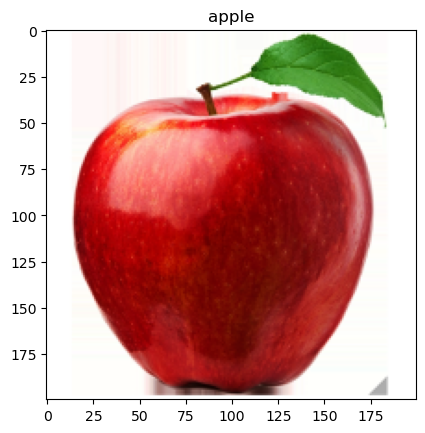

In [47]:
#The first training image and its label
plt.imshow(cv.cvtColor(trainimages[0], cv.COLOR_BGR2RGB))
plt.title(unique_labels[np.argmax(trainlabels[0])])
plt.show()

# Build the model


In [48]:
model = Sequential()
model.add(Conv2D(kernel_size=(3, 3), filters=30, activation='tanh', input_shape=(200, 200, 3)))
model.add(Conv2D(filters=30, kernel_size=(3, 3), activation='tanh'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(filters=30, kernel_size=(3, 3), activation='tanh'))
model.add(MaxPool2D(3, 3))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(len(unique_labels), activation='softmax'))

C:\Users\microsoft\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 198, 198, 30)   │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 196, 196, 30)   │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 98, 98, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 96, 96, 30)     │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 30720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │       614,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            64 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 631,899 (2.41 MB)

 Trainable params: 631,899 (2.41 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [50]:
history = model.fit(xtrain, ytrain, epochs=10, batch_size=50, validation_data=(xval, yval))


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - acc: 0.1940 - loss: 1.7170 - val_acc: 0.3667 - val_loss: 1.3896
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - acc: 0.3084 - loss: 1.4169 - val_acc: 0.5333 - val_loss: 1.0818
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - acc: 0.5647 - loss: 1.0867 - val_acc: 0.6333 - val_loss: 0.8622
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - acc: 0.6053 - loss: 0.8717 - val_acc: 0.8000 - val_loss: 0.6210
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - acc: 0.7627 - loss: 0.6810 - val_acc: 0.7833 - val_loss: 0.5869
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - acc: 0.7384 - loss: 0.5797 - val_acc: 0.8833 - val_loss: 0.4928
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - acc: 0.8609 - loss: 0.4265 - val_acc: 0.8833 - val_loss: 0.3795
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - acc: 0.8531 - loss: 0.3860 - val_acc: 0.8167 - val_loss: 0.4025
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - acc: 0.8836 - loss: 0.2851 - val_acc: 0.9000 -

# Evaluate the model on validation data

In [51]:
evaluate = model.evaluate(xval, yval)
print("Evaluation on validation data:", evaluate)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step - acc: 0.9340 - loss: 0.2264
Evaluation on validation data: [0.2402646690607071, 0.9166666865348816]


# Evaluate on random test images

In [52]:
import random


In [53]:
num_random_images = 5
random_indices = random.sample(range(len(testimages)), num_random_images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


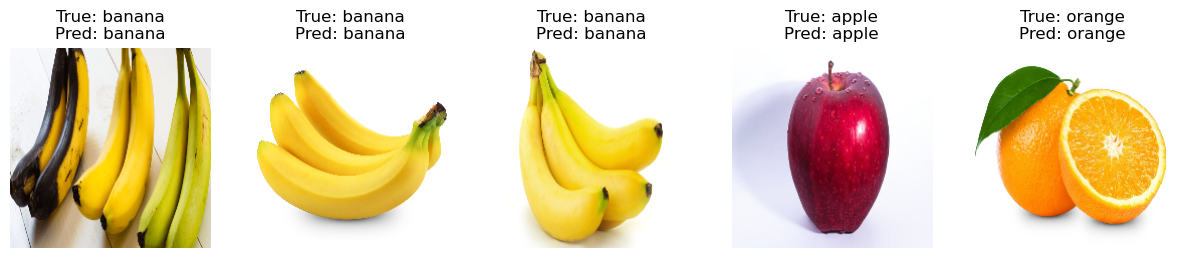

In [54]:

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    img = testimages[idx]
    true_label = testlabels[idx]
    img_expanded = np.expand_dims(img, axis=0)
    prediction = model.predict(img_expanded)
    predicted_label = unique_labels[np.argmax(prediction)]

    plt.subplot(1, num_random_images, i + 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title(f'True: {true_label}\nPred: {predicted_label}')
    plt.axis('off')

plt.show()